In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname, _, filenames)
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input ['facial-keypoints-detection'] []
/kaggle/input/facial-keypoints-detection [] ['training.zip', 'SampleSubmission.csv', 'IdLookupTable.csv', 'test.zip']
/kaggle/input/facial-keypoints-detection/training.zip
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/IdLookupTable.csv
/kaggle/input/facial-keypoints-detection/test.zip


# Read Data

In [2]:
INPUT_PATH = r'/kaggle/input/facial-keypoints-detection'
OUTPUT_PATH = r'/kaggle/working'

In [3]:
import zipfile

TRAINING_PATH = os.path.join(INPUT_PATH, 'training.zip')
TEST_PATH = os.path.join(INPUT_PATH, 'test.zip')

with zipfile.ZipFile(TRAINING_PATH, 'r') as zip_ref:
    with zip_ref.open('training.csv') as csv_file:

        df_train = pd.read_csv(csv_file)
        
with zipfile.ZipFile(TEST_PATH, 'r') as zip_ref:
    with zip_ref.open('test.csv') as csv_file:

        df_test = pd.read_csv(csv_file)
        
zip_ref.close()


In [4]:
df_train.shape

(7049, 31)

In [5]:
df_train.T.head()

,0,1,2,3,4,5,6,7,8,9,...,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301,69.680748,64.131866,67.468893,65.80288,64.121231,...,69.229935,63.352951,65.711151,67.929319,66.867222,67.402546,66.1344,66.690732,70.965082,66.938311
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261,39.968748,34.29004,39.413452,34.7552,36.740308,...,38.575634,35.671311,38.843545,35.846552,37.356855,31.842551,38.365501,36.845221,39.853666,43.42451
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481,29.183551,29.578953,29.355961,27.47584,29.468923,...,29.407912,33.952078,32.268751,28.68782,30.750926,29.746749,30.478626,31.66642,30.543285,31.096059
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032,37.563364,33.13804,39.621717,36.1856,38.390154,...,38.34545,40.816448,37.706043,41.452484,40.115743,38.632942,39.950198,39.685042,40.772339,39.528604
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589,62.864299,57.797154,59.554951,58.65216,58.620923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_train.T.tail()

,0,1,2,3,4,5,6,7,8,9,...,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048
mouth_center_top_lip_x,43.312602,46.684596,47.274947,50.303165,44.962748,49.308112,45.127732,48.100194,49.21344,49.270154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouth_center_top_lip_y,72.935459,70.266553,70.191789,70.091687,73.707387,78.487626,65.099597,71.278602,67.648,67.542769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mouth_center_bottom_lip_x,43.130707,45.467915,47.274947,51.561183,44.227141,49.432374,45.415732,48.516816,49.49952,49.545231,...,50.124542,50.367575,49.786191,52.446275,47.555045,50.426637,50.287397,49.462572,50.065186,45.90048
mouth_center_bottom_lip_y,84.485774,85.48017,78.659368,78.268383,86.871166,93.898766,78.05702,91.063922,83.09312,76.893538,...,80.239123,70.952324,78.200923,81.227824,79.492551,79.683921,77.983023,78.11712,79.586447,82.773096
Image,238 236 237 238 240 240 239 241 241 243 240 23...,219 215 204 196 204 211 212 200 180 168 178 19...,144 142 159 180 188 188 184 180 167 132 84 59 ...,193 192 193 194 194 194 193 192 168 111 50 12 ...,147 148 160 196 215 214 216 217 219 220 206 18...,167 169 170 167 156 145 106 68 52 24 20 15 21 ...,109 109 125 141 145 139 120 81 45 34 31 35 36 ...,178 177 178 179 179 179 181 185 188 184 192 20...,164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...,226 227 225 224 221 220 215 210 210 208 206 18...,...,43 49 57 67 81 98 97 94 91 94 97 101 96 91 88 ...,139 140 143 141 141 140 140 139 140 141 143 14...,164 165 167 168 169 170 172 171 170 171 173 16...,254 235 191 141 106 93 94 123 168 178 178 186 ...,150 150 132 63 44 74 86 61 62 57 44 70 93 115 ...,71 74 85 105 116 128 139 150 170 187 201 209 2...,60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...,74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...,254 254 254 254 254 238 193 145 121 118 119 10...,53 62 67 76 86 91 97 105 105 106 107 108 112 1...


In [7]:
id_lookup = pd.read_csv(os.path.join(INPUT_PATH, 'IdLookupTable.csv'))
id_lookup.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [8]:
df_train.isnull().any().value_counts()

True     28
False     3
Name: count, dtype: int64

In [9]:
df_train.dropna().shape

(2140, 31)

In [10]:
df_train = df_train.ffill()
df_train.isnull().any().value_counts()

False    31
Name: count, dtype: int64

# Visualize data

In [11]:
import matplotlib.pyplot as plt

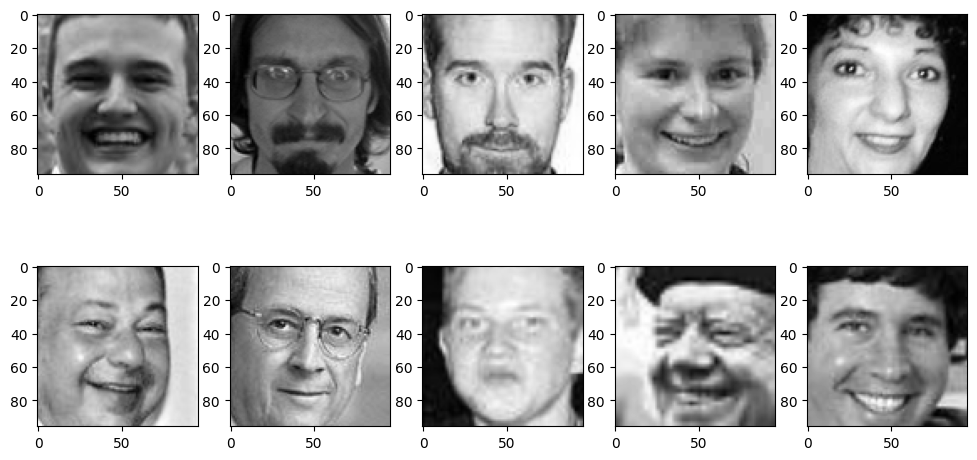

In [12]:
random_imgs = np.random.choice(df_train.Image.apply(lambda x: np.array([0 if x == '' else int(x) for x in x.split(' ')])), 10)

plt.figure(figsize=(12, 6))
for j, i in enumerate(random_imgs):
    img = i.reshape(96, 96)
    plt.subplot(2, 5, j+1)
    plt.imshow(img,cmap='gray')
plt.show()
    

In [13]:
points = df_train.iloc[10:20].drop('Image', axis = 1).values
imgs = np.vstack(df_train.iloc[10:20].Image.apply(lambda x: np.array([0 if x == '' else int(x) for x in x.split(' ')])).values)


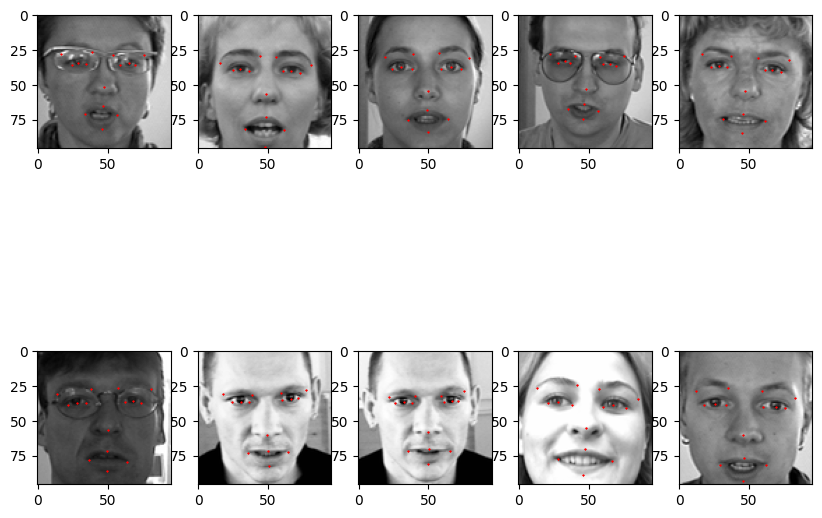

In [14]:
t = 1
plt.figure(figsize=(10, 8))

for img, p in zip(imgs, points):
    plt.subplot(2, 5, t)
    
    image = plt.imshow(img.reshape(96, 96),cmap='gray')

    for i in range(1,31,2):
        plt.plot(p[i-1], p[i], 'r*', ms=1)
    t += 1
plt.show()

In [15]:
points[0]

array([65.23018868, 34.34264151, 28.80271698, 33.93781132, 58.75381132,
       35.55713208, 70.08633962, 35.55713208, 34.46943396, 35.15230189,
       24.35049057, 35.55713208, 53.89675472, 28.27109434, 76.15788679,
       28.27109434, 38.51683019, 26.24784906, 16.6605283 , 27.86716981,
       47.42128302, 51.74671698, 57.13449057, 71.57977358, 34.06460377,
       70.77011321, 46.46943396, 65.26007547, 46.20679245, 81.69781132])

# Train-Test

In [16]:
imgs = np.vstack(df_train.Image.apply(lambda x: np.array([0 if x == '' else int(x) for x in x.split(' ')])).values)

In [17]:
imgs.shape

(7049, 9216)

In [18]:
imgs = imgs.reshape(-1, 96, 96, 1) / 255
imgs.shape

(7049, 96, 96, 1)

In [19]:
y = df_train.drop('Image', axis = 1).values
y.shape

(7049, 30)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(imgs, y, test_size=0.2, random_state=42)

In [36]:
# !pip install -U tensorflow==2.0.0

In [37]:
import tensorflow as tf

In [39]:
print(X_train.shape)
print(X_test.shape)

(5639, 96, 96, 1)
(1410, 96, 96, 1)


In [41]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.astype('float32'), y_train.astype('float32')))
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size=64)

val_dataset = tf.data.Dataset.from_tensor_slices((X_test.astype('float32'), y_test.astype('float32')))
val_dataset = val_dataset.batch(batch_size=64)

# Model

In [53]:
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization, Input
from tensorflow.keras.metrics import RootMeanSquaredError

In [54]:
def add_cnn_block(prev, n_filter, n_kernel=(3, 3), padding='same', activation='relu', pool=(2, 2)):
    
    post = Conv2D(n_filter, n_kernel, padding=padding, activation=activation)(prev)
    post = BatchNormalization()(post)
    post = MaxPool2D(pool_size=pool)(post)
    
    return post

In [55]:
in_layer = Input(shape=(96, 96, 1))

x = add_cnn_block(in_layer, 256)


for filters in [128, 64, 32]:
    x = add_cnn_block(x, filters)
    
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(30)(x)

model = tf.keras.Model(in_layer, x)

In [56]:
model.compile(optimizer='Adam', metrics=[RootMeanSquaredError(), 'accuracy'], loss='mae')


In [57]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 96, 96, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 96, 96, 256)    │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 96, 96, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 48, 48, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 30)             │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 549,566 (2.10 MB)

 Trainable params: 548,606 (2.09 MB)

 Non-trainable params: 960 (3.75 KB)

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)


In [59]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=200)

Epoch 1/300
 2/89 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.0039 - loss: 47.8520 - root_mean_squared_error: 51.4476     

W0000 00:00:1712078251.813025      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.0369 - loss: 28.0466 - root_mean_squared_error: 35.1775

W0000 00:00:1712078264.335051      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712078264.939257      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


89/89 ━━━━━━━━━━━━━━━━━━━━ 22s 157ms/step - accuracy: 0.0376 - loss: 27.9354 - root_mean_squared_error: 35.0702 - val_accuracy: 0.1397 - val_loss: 31.9061 - val_root_mean_squared_error: 34.5899
Epoch 2/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.2507 - loss: 8.9240 - root_mean_squared_error: 11.4462 - val_accuracy: 0.5957 - val_loss: 25.5615 - val_root_mean_squared_error: 28.2222
Epoch 3/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.2882 - loss: 7.3626 - root_mean_squared_error: 9.5433 - val_accuracy: 0.5879 - val_loss: 24.3560 - val_root_mean_squared_error: 26.9176
Epoch 4/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.3170 - loss: 6.4185 - root_mean_squared_error: 8.3988 - val_accuracy: 0.4709 - val_loss: 25.9062 - val_root_mean_squared_error: 28.1507
Epoch 5/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.3553 - loss: 6.2569 - root_mean_squared_error: 8.2438 - val_accuracy: 0.6206 - val_loss: 19.3907 - val_root_mean_squared_error: 21.11

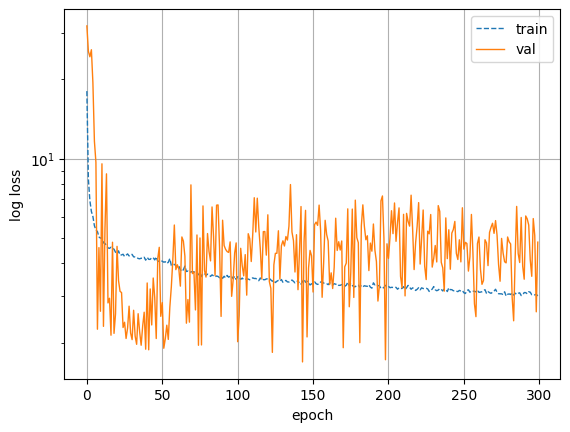

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss,"--",linewidth=1,label="train")
plt.plot(val_loss,linewidth=1,label="val")

plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("log loss")
plt.show()

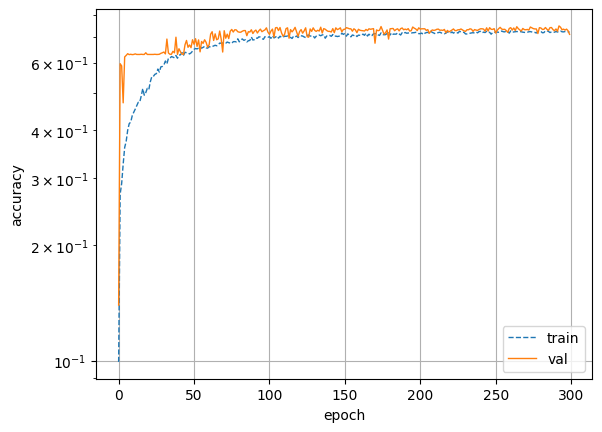

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc,"--",linewidth=1,label="train")
plt.plot(val_acc,linewidth=1,label="val")
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [63]:
test_imgs = np.vstack(df_test.Image.apply(lambda x: np.array([0 if x == '' else int(x) for x in x.split(' ')])).values)
test_imgs = test_imgs.reshape(-1, 96, 96, 1) / 255


In [64]:
y_pred = model.predict(test_imgs)
y_pred

20/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

W0000 00:00:1712080703.376043      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step


W0000 00:00:1712080706.948741      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


array([[62.098103, 34.395187, 27.7011  , ..., 66.89414 , 44.702305,
        77.943634],
       [59.595592, 33.38053 , 26.67736 , ..., 65.29909 , 42.984974,
        73.927505],
       [59.69819 , 32.471474, 27.284033, ..., 64.65994 , 45.05268 ,
        72.72533 ],
       ...,
       [60.827408, 35.17357 , 27.920542, ..., 69.489685, 43.544865,
        71.41913 ],
       [58.858955, 33.83104 , 27.170101, ..., 67.10151 , 42.75981 ,
        68.91682 ],
       [60.82121 , 35.152912, 27.710003, ..., 69.56823 , 43.416412,
        71.7962  ]], dtype=float32)

In [68]:
id_lookup

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
...,...,...,...,...
27119,27120,1783,right_eye_center_y,NaN
27120,27121,1783,nose_tip_x,NaN
27121,27122,1783,nose_tip_y,NaN
27122,27123,1783,mouth_center_bottom_lip_x,NaN


In [66]:
feature_names = list(id_lookup['FeatureName'])
image_ids = list(id_lookup['ImageId']-1)
row_ids = list(id_lookup['RowId'])

feature_list = []
for feature in feature_names:
    feature_list.append(feature_names.index(feature))
    
predictions = []
for x,y in zip(image_ids, feature_list):
    predictions.append(y_pred[x][y])

In [67]:
row_ids = pd.Series(row_ids, name = 'RowId')
locations = pd.Series(predictions, name = 'Location')
locations = locations.clip(0.0,96.0)
submission_result = pd.concat([row_ids,locations], axis = 1)
submission_result.to_csv('submission.csv',index = False)